In [1]:
using ElasticNetworks, Statistics, LinearAlgebra, LaTeXStrings, Plots

In [2]:
cyto_net = load_network("../data/threshold0x001_conc0.5_maxrl3_epsilon0x05_17500.jld2")

Network(Graphs.SimpleGraphs.SimpleGraph{Int64}(2712, [[412, 458, 612, 924], [181, 527, 746, 1015], [200, 214, 514, 1112], [362, 720, 840, 999], [474, 556, 759, 1174], [63, 272, 1251, 1322], [161, 502, 905, 1034], [166, 1066, 1079, 1357], [218, 526, 575, 927], [480, 657, 931, 1147]  …  [874, 951, 1125, 1346], [953, 1138], [424, 667, 759, 1310], [266, 865, 950, 1354], [319, 488, 1030, 1353], [142, 713, 718], [933, 936, 1246, 1337], [8, 417, 1134, 1323], [349, 836], [277, 883, 1124, 1188]]), [9.476602765191119 0.0 0.0; 0.0 9.476602765191119 0.0; 0.0 0.0 9.476602765191119], [0.4429688523099677 0.9061310853536576 … 0.3843917839773365 0.5644204364443353; 0.11979434959477729 0.1248132372113974 … 0.5557191867434257 0.6751780574549422; 0.7208687410260229 0.49753360892757537 … 0.15001709127584134 0.16373808687099756], Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64}(Edge 462 => 961 => 2.2870658521413882, Edge 401 => 1057 => 2.215731111731312, Edge 1012 => 1153 => 1.129449820263001, Edge 80 =

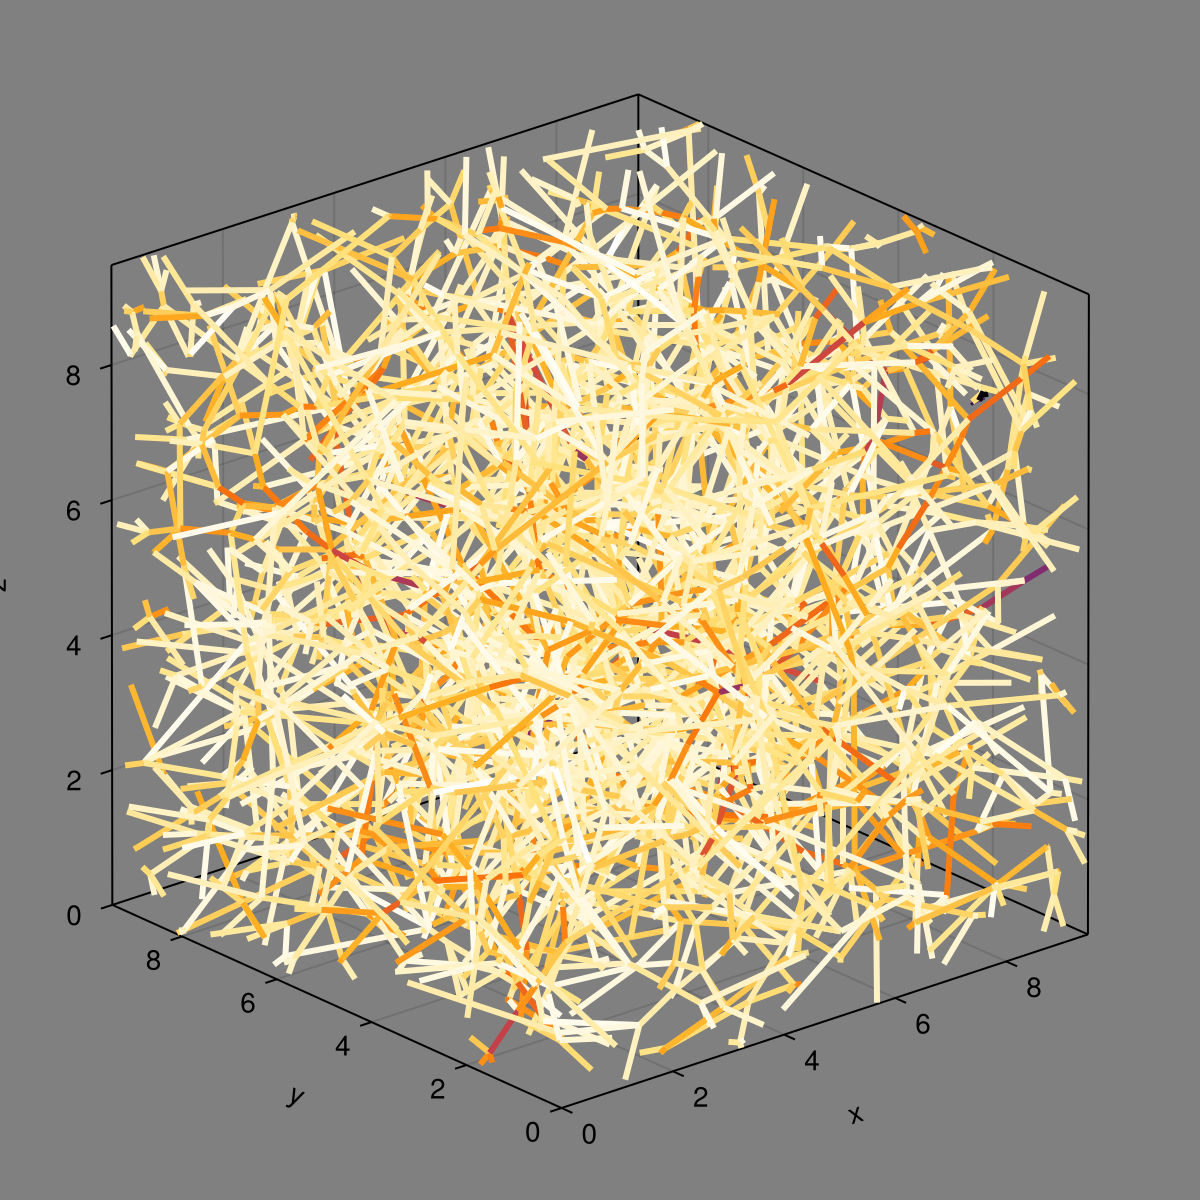

In [3]:
visualize_net(cyto_net)

In [5]:
function uniaxial(ϵ, net)
    net_dilated = deepcopy(net)
    net_dilated.basis[1, 1] *= (1 + ϵ) #apply ϵ uniaxial strain
    return moduli(net_dilated)[1:2]
end

uniaxial (generic function with 1 method)

In [8]:
uniaxial_result = zeros(0, 3)
for ϵ = 0:0.05:0.2
    res = uniaxial(ϵ)
    uniaxial_result = vcat(uniaxial_result, [ϵ res[1] res[2]])
end

B = 0.28269569429851776 
 G = 0.026874514393417252 
 c1111 = 0.3526109201439431 
 c2222 = 0.317510384533873 
 c3333 = 0.2866431813566683 
 c1212 = 0.026659515851404265 
 c1313 = 0.028182678839586056 
 c2323 = 0.025191675706630532 
 c1122 = 0.278453915746671 
 c1133 = 0.2666222905934444 
 c2233 = 0.24867217498597272
B = 0.30565238146930096 
 G = 0.05825041003534112 
 c1111 = 0.5182034734143361 
 c2222 = 0.3329476671999978 
 c3333 = 0.3081828630449465 
 c1212 = 0.05925051430506285 
 c1313 = 0.062455361293971126 
 c2323 = 0.048357744951982855 
 c1122 = 0.2921184754006354 
 c1133 = 0.28408185444133516 
 c2233 = 0.21956838494024367
B = 0.31369520957503727 
 G = 0.0829789160239432 
 c1111 = 0.63956119212454 
 c2222 = 0.336775438515104 
 c3333 = 0.31619903024201723 
 c1212 = 0.08553138563994878 
 c1313 = 0.0901364267278055 
 c2323 = 0.06350175167368691 
 c1122 = 0.28770479874254673 
 c1133 = 0.2827429524425115 
 c2233 = 0.19491286146177889
B = 0.31831296458394237 
 G = 0.10372944527286056 
 c

In [9]:
uniaxial_result

5×3 Matrix{Float64}:
 0.0   0.282696  0.0268745
 0.05  0.305652  0.0582504
 0.1   0.313695  0.0829789
 0.15  0.318313  0.103729
 0.2   0.321718  0.121842

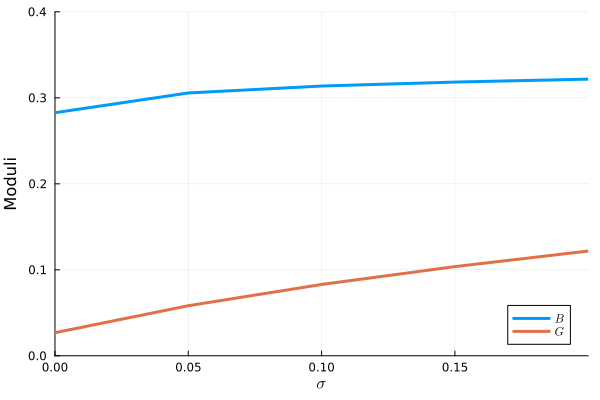

In [ ]:

plot(uniaxial_result[:, 1], uniaxial_result[:, 2], label = L"B", linewidth = 3)
plot!(uniaxial_result[:, 1], uniaxial_result[:, 3], label = L"G", linewidth = 3, ylims = (0, 0.4), xlims = (0, 0.2))
xlabel!(L"σ")
ylabel!("Moduli")


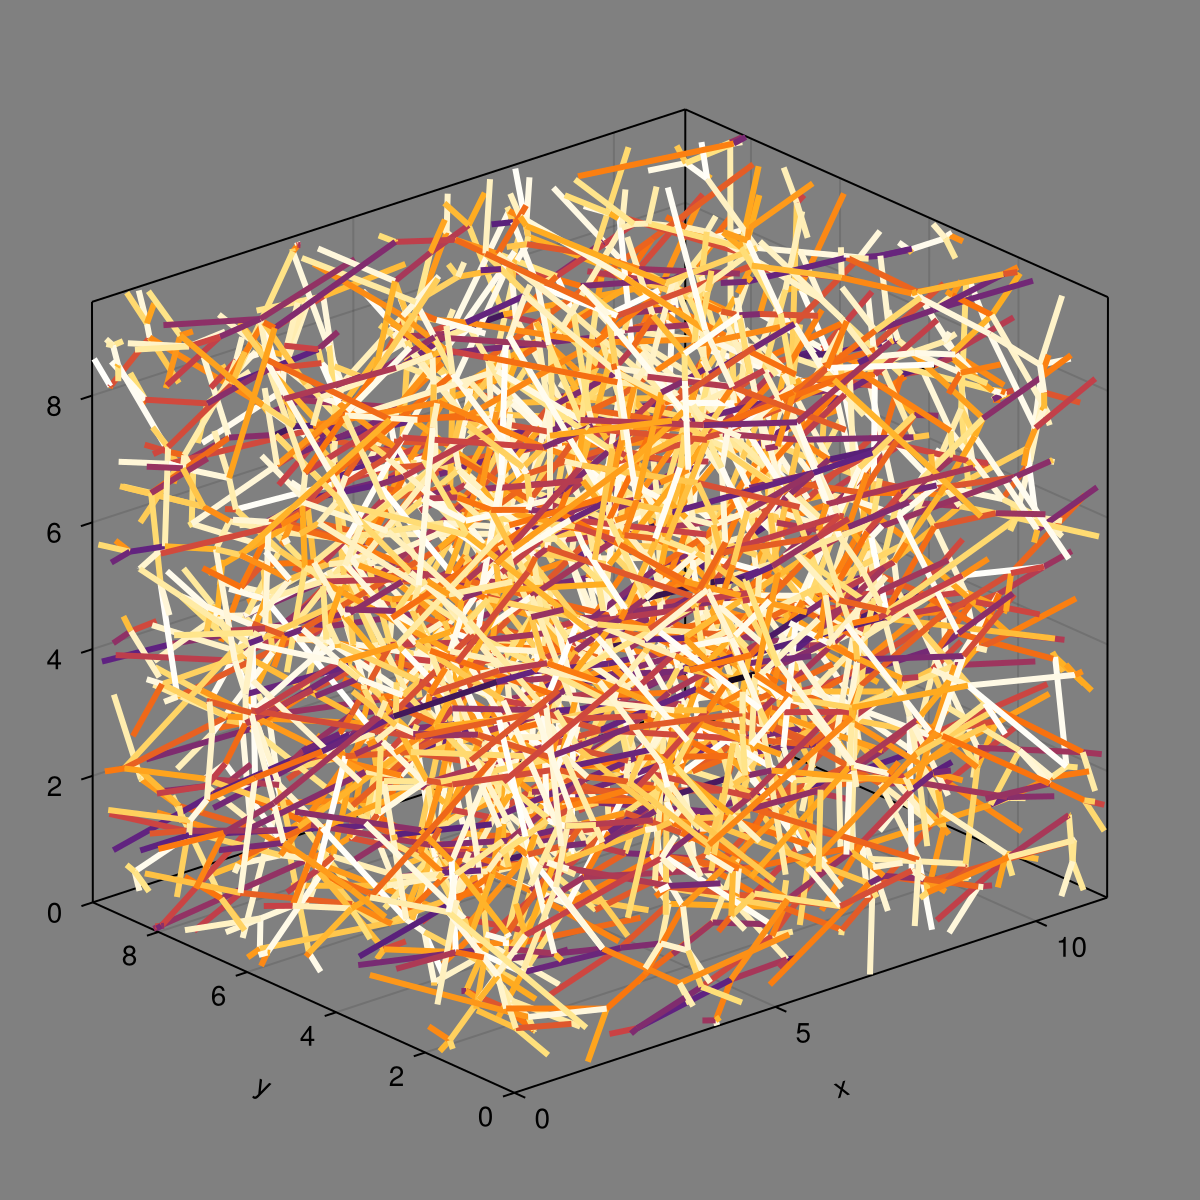

In [3]:
cyto_net_dilated = deepcopy(cyto_net)
cyto_net_dilated.basis[1, 1] *= (1 + 0.2)
visualize_net(cyto_net_dilated)

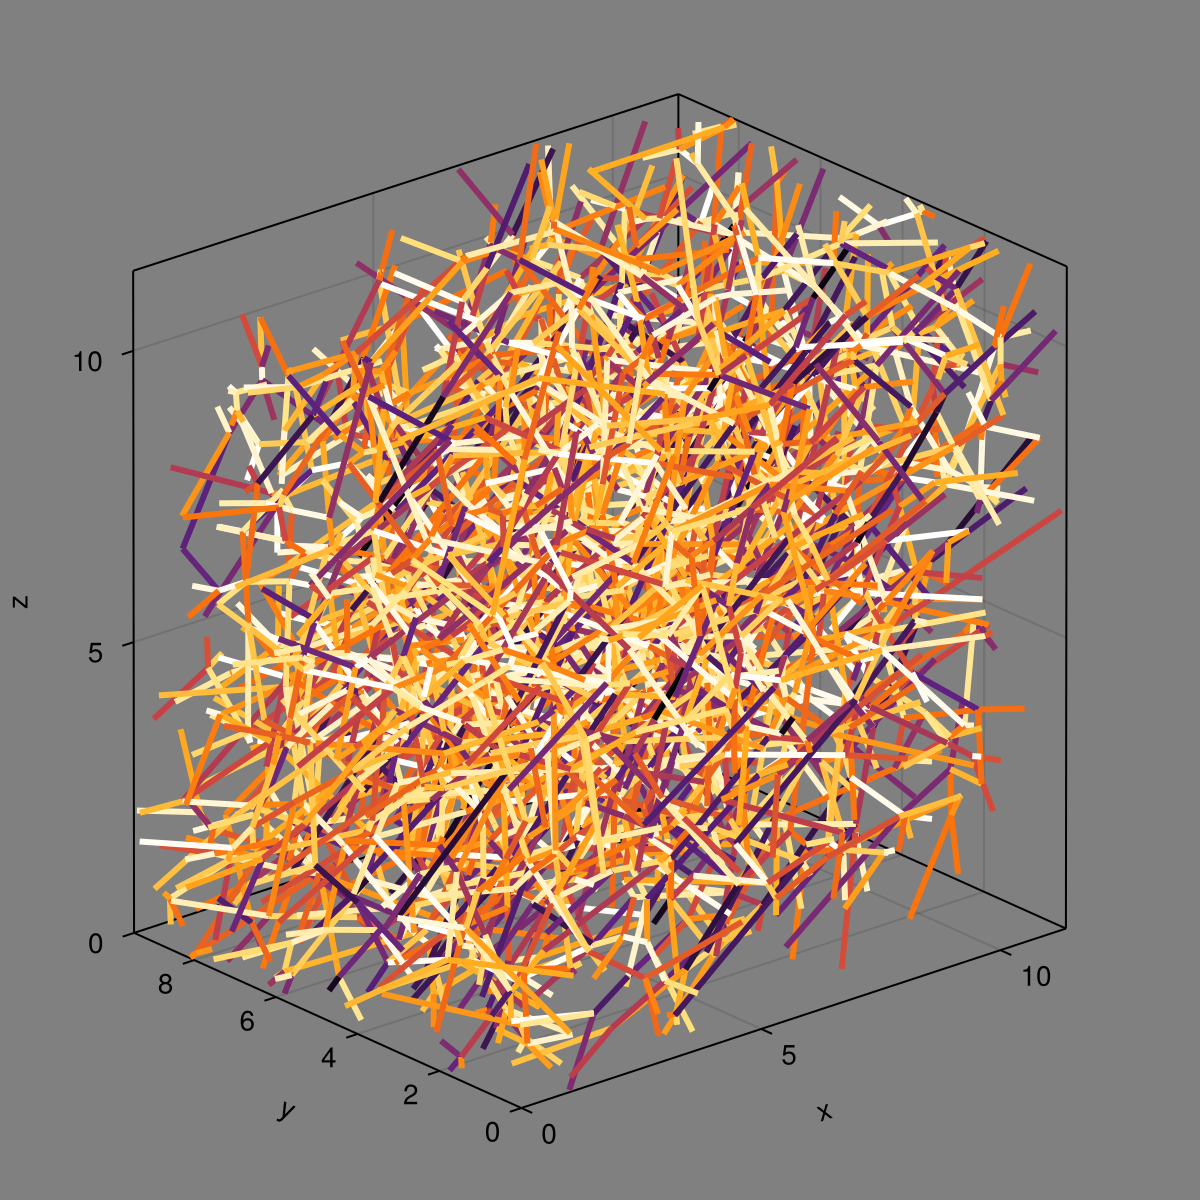

In [11]:
function shearxz(ϵ, net)
    net_sheared = deepcopy(net)
    net_sheared.basis *= ([0 0 ϵ; 0 0 0; ϵ 0 0] + I)
    return net_sheared
end

function shearxz_moduli(ϵ, net)
    return moduli(shearxz(ϵ, net))[1:2]
end

visualize_net(shearxz(0.2, cyto_net))

In [4]:
shear_result = zeros(0, 3)
for ϵ = 0:0.05:0.3
    res = shearxz_moduli(ϵ)
    shear_result = vcat(shear_result, [ϵ res[1] res[2]])
end
shear_result

B = 0.28269569429851776 
 G = 0.026874514393417252 
 c1111 = 0.3526109201439431 
 c2222 = 0.317510384533873 
 c3333 = 0.2866431813566683 
 c1212 = 0.026659515851404265 
 c1313 = 0.028182678839586056 
 c2323 = 0.025191675706630532 
 c1122 = 0.278453915746671 
 c1133 = 0.2666222905934444 
 c2233 = 0.24867217498597272
B = 0.26744649232818957 
 G = 0.037757943082959086 
 c1111 = 0.3499721485648466 
 c2222 = 0.30239112559527354 
 c3333 = 0.2872468646737129 
 c1212 = 0.03284062652485775 
 c1313 = 0.05532308475729142 
 c2323 = 0.03199067320801402 
 c1122 = 0.2536691463463875 
 c1133 = 0.25285121188333937 
 c2233 = 0.2271837878302097
B = 0.25739764326929265 
 G = 0.057507502474388295 
 c1111 = 0.36447517098227394 
 c2222 = 0.29647228242949547 
 c3333 = 0.30383188448963905 
 c1212 = 0.04565941292408539 
 c1313 = 0.10020746525635443 
 c2323 = 0.04537743014473636 
 c1122 = 0.2277228393188181 
 c1133 = 0.24285536341973846 
 c2233 = 0.20532152302255624
B = 0.26103375864128553 
 G = 0.07969569076692

7×3 Matrix{Float64}:
 0.0   0.282696  0.0268745
 0.05  0.267446  0.0377579
 0.1   0.257398  0.0575075
 0.15  0.261034  0.0796957
 0.2   0.27192   0.103206
 0.25  0.288286  0.127989
 0.3   0.310777  0.154735

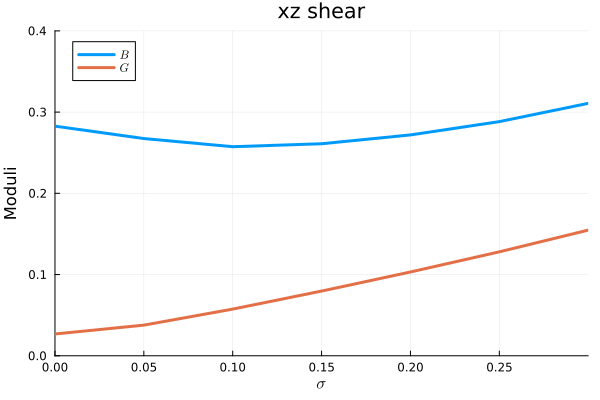

In [6]:
plot(shear_result[:, 1], shear_result[:, 2], label = L"B", linewidth = 3, title = "xz shear")
plot!(shear_result[:, 1], shear_result[:, 3], label = L"G", linewidth = 3, ylims = (0, 0.4), xlims = (0, 0.3))
xlabel!(L"σ")
ylabel!("Moduli")

In [4]:
cube_net = cubic_network(10, 10)

Network(Graphs.SimpleGraphs.SimpleGraph{Int64}(3000, [[2, 10, 11, 91, 101, 901], [1, 3, 12, 92, 102, 902], [2, 4, 13, 93, 103, 903], [3, 5, 14, 94, 104, 904], [4, 6, 15, 95, 105, 905], [5, 7, 16, 96, 106, 906], [6, 8, 17, 97, 107, 907], [7, 9, 18, 98, 108, 908], [8, 10, 19, 99, 109, 909], [1, 9, 20, 100, 110, 910]  …  [91, 891, 901, 981, 992, 1000], [92, 892, 902, 982, 991, 993], [93, 893, 903, 983, 992, 994], [94, 894, 904, 984, 993, 995], [95, 895, 905, 985, 994, 996], [96, 896, 906, 986, 995, 997], [97, 897, 907, 987, 996, 998], [98, 898, 908, 988, 997, 999], [99, 899, 909, 989, 998, 1000], [100, 900, 910, 990, 991, 999]]), [10.0 0.0 0.0; 0.0 10.0 0.0; 0.0 0.0 10.0], [0.0 0.0 … 0.9 0.9; 0.0 0.0 … 0.9 0.9; 0.0 0.1 … 0.8 0.9], Dict{Graphs.SimpleGraphs.SimpleEdge{Int64}, Float64}(Edge 35 => 36 => 0.9999999999999998, Edge 198 => 199 => 1.0000000000000009, Edge 254 => 264 => 0.9999999999999998, Edge 307 => 317 => 1.0, Edge 750 => 760 => 0.9999999999999998, Edge 312 => 313 => 1.0, Edge 59

In [8]:
#uniaxial_cube = zeros(0, 3)
for ϵ = 0.25:0.05:0.3
    res = uniaxial(ϵ, cube_net)
    uniaxial_cube = vcat(uniaxial_cube, [ϵ res[1] res[2]])
end

B = 0.3166666666666666 
 G = 0.21499999999999997 
 c1111 = 1.25 
 c2222 = 0.8 
 c3333 = 0.8 
 c1212 = 0.0625 
 c1313 = 0.0625 
 c2323 = 2.664535259100888e-18 
 c1122 = 0.0 
 c1133 = 0.0 
 c2233 = 0.0
B = 0.3153846153846195 
 G = 0.21923076923077023 
 c1111 = 1.3000000000000267 
 c2222 = 0.7692307692307693 
 c3333 = 0.7692307692307693 
 c1212 = 0.0749999999999989 
 c1313 = 0.0749999999999989 
 c2323 = 1.0675221390627178e-18 
 c1122 = 2.6645352591003757e-15 
 c1133 = 2.4424906541753444e-15 
 c2233 = 0.0


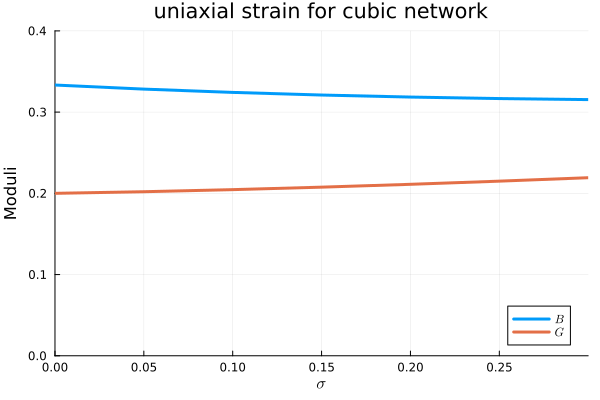

In [9]:
plot(uniaxial_cube[:, 1], uniaxial_cube[:, 2], label = L"B", linewidth = 3, title = "uniaxial strain for cubic network")
plot!(uniaxial_cube[:, 1], uniaxial_cube[:, 3], label = L"G", linewidth = 3, ylims = (0, 0.4), xlims = (0, 0.3))
xlabel!(L"σ")
ylabel!("Moduli")

In [16]:
shear_cube = zeros(0, 3)
for ϵ = 0:0.025:0.3
    res = shearxz_moduli(ϵ, cube_net)
    shear_cube = vcat(shear_cube, [ϵ res[1] res[2]])
end
shear_cube

B = 0.3333333333333333 
 G = 0.2 
 c1111 = 1.0 
 c2222 = 1.0 
 c3333 = 1.0 
 c1212 = 0.0 
 c1313 = 0.0 
 c2323 = 0.0 
 c1122 = 0.0 
 c1133 = 0.0 
 c2233 = 0.0
B = 0.33383687449452737 
 G = 0.2002243386519913 
 c1111 = 1.0000011716924397 
 c2222 = 1.0006251942225313 
 c3333 = 1.0000024426667142 
 c1212 = 7.828523443420954e-5 
 c1313 = 0.0014059827145888701 
 c2323 = 7.833276188207637e-5 
 c1122 = 7.409199254126975e-8 
 c1133 = 0.001249790081478963 
 c2233 = 0.0007016667610593164
B = 0.33475806232853 
 G = 0.20107651321462966 
 c1111 = 1.0000187385334176 
 c2222 = 1.002506196833689 
 c3333 = 1.000018793438734 
 c1212 = 0.0003135375330604373 
 c1313 = 0.0056207515833408914 
 c2323 = 0.00031350604662159587 
 c1122 = 6.220020001057591e-6 
 c1133 = 0.004994193617769982 
 c2233 = 0.0001390024376937138
B = 0.33283852370775935 
 G = 0.20362711207796327 
 c1111 = 1.0000947963805868 
 c2222 = 1.0056050781547743 
 c3333 = 1.0008336893492975 
 c1212 = 0.0007498172900787293 
 c1313 = 0.0126449262146

13×3 Matrix{Float64}:
 0.0    0.333333  0.2
 0.025  0.333837  0.200224
 0.05   0.334758  0.201077
 0.075  0.332839  0.203627
 0.1    0.400478  0.203863
 0.125  0.350258  0.20492
 0.15   0.349226  0.210294
 0.175  0.368153  0.210077
 0.2    0.344291  0.222637
 0.225  0.400647  0.227196
 0.25   0.370953  0.229159
 0.275  0.371809  0.238075
 0.3    0.389456  0.242745

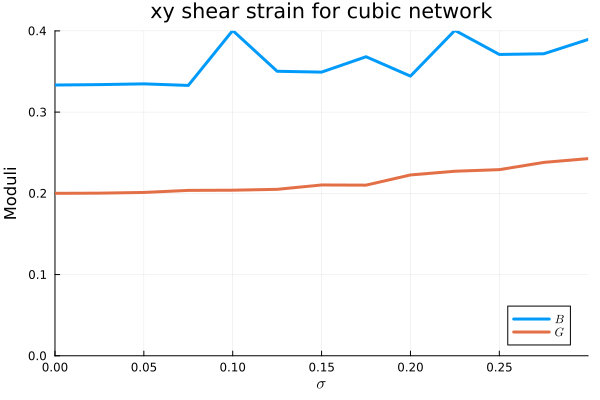

In [17]:
plot(shear_cube[:, 1], shear_cube[:, 2], label = L"B", linewidth = 3, title = "xy shear strain for cubic network")
plot!(shear_cube[:, 1], shear_cube[:, 3], label = L"G", linewidth = 3, ylims = (0, 0.4), xlims = (0, 0.3))
xlabel!(L"σ")
ylabel!("Moduli")

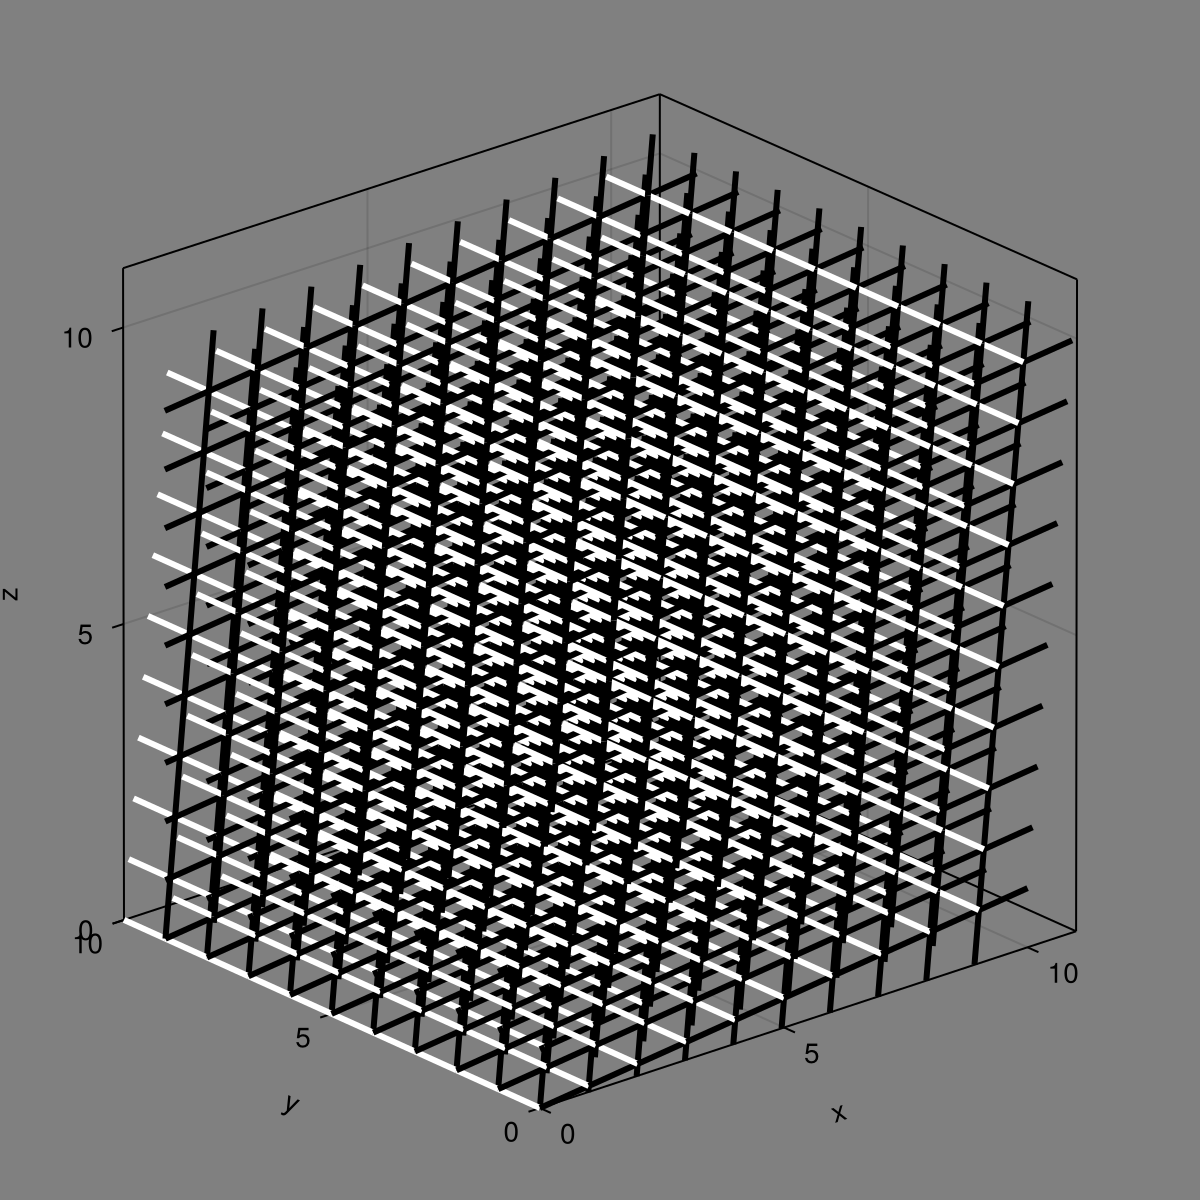

In [18]:
visualize_net(shearxz(0.1, cube_net))